# Libraries

In [1]:
# !pip install tensorflow-addons
# !pip3 install kagglehub

# #Installing Qiskit Packages
# !pip install qiskit
# !pip install qiskit_machine_learning
# !pip install qiskit_algorithms
# !pip install qiskit_ibm_runtime

In [2]:
from pathlib import Path
import tensorflow as tf
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import requests
import seaborn as sns

#Importing Libraries
from sklearn.svm import SVC

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from qiskit.utils import algorithm_globals
from qiskit.circuit.library import PauliFeatureMap, ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import BaseSampler
#from qiskit.primitives import Sampler
#from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

np.random.seed(42)
#algorithm_globals.random_seed = 123

/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Dataset

[ClaMp](https://www.kaggle.com/code/ssmohanty/dimensionality-reduction-techniques)

In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("saurabhshahane/classification-of-malwares")

# print("Path to dataset files:", path)

In [4]:
import pandas as pd
import os

# Define the dataset path
dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

# List files in the directory to find the CSV file
files = os.listdir(dataset_path)
csv_files = [f for f in files if f.endswith('.csv')]

# Load the first CSV file (assuming there's only one)
if csv_files:
    df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
    print("CSV found and send to df")  # Display first few rows
else:
    print("No CSV file found in the dataset directory.")

CSV found and send to df


In [5]:
df.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,...,1194954,3,64,1048576,4096,1048576,4096,0,16,0
1,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,0
2,23117,144,3,0,4,0,65535,0,184,0,...,67688,2,320,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,...,113668,2,1344,1048576,4096,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,...,69089,2,33088,262144,8192,1048576,4096,0,16,0


In [6]:
target = 'class'

In [7]:
import pandas as pd

def create_balanced_sample(df, target_column='class', num_samples=1000):
    # Ensure that num_samples is even to allow 50/50 split
    if num_samples % 2 != 0:
        raise ValueError("Number of samples must be even to ensure 50% distribution of labels.")

    # Split the data into two groups: one for each class
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Find the minimum number of samples between the two classes to avoid imbalance issues
    min_class_size = min(len(class_0), len(class_1))
    
    if min_class_size * 2 < num_samples:
        raise ValueError(f"Not enough data to create a balanced dataset of {num_samples} samples.")

    # Sample from each class to ensure 50/50 split
    half_samples = num_samples // 2
    class_0_sample = class_0.sample(n=half_samples)
    class_1_sample = class_1.sample(n=half_samples)
    
    # Concatenate the two samples to form the balanced dataset
    df_n = pd.concat([class_0_sample, class_1_sample]).sample(frac=1).reset_index(drop=True)  # Shuffle and reset index
    
    return df_n

# Usage
y = df[target]
X = df.drop(columns=[target])

# Create balanced sample
df_n = create_balanced_sample(df)
print(df_n.shape)

(1000, 56)


In [8]:
print(df.isna().sum())

e_magic                           0
e_cblp                            0
e_cp                              0
e_crlc                            0
e_cparhdr                         0
e_minalloc                        0
e_maxalloc                        0
e_ss                              0
e_sp                              0
e_csum                            0
e_ip                              0
e_cs                              0
e_lfarlc                          0
e_ovno                            0
e_res                          5184
e_oemid                           0
e_oeminfo                         0
e_res2                         5184
e_lfanew                          0
Machine                           0
NumberOfSections                  0
CreationYear                      0
PointerToSymbolTable              0
NumberOfSymbols                   0
SizeOfOptionalHeader              0
Characteristics                   0
Magic                             0
MajorLinkerVersion          

In [9]:
#df.dropna(axis=1, inplace=True)
df_cleaned = df.dropna(axis=1)
print(df.isna().sum())

e_magic                           0
e_cblp                            0
e_cp                              0
e_crlc                            0
e_cparhdr                         0
e_minalloc                        0
e_maxalloc                        0
e_ss                              0
e_sp                              0
e_csum                            0
e_ip                              0
e_cs                              0
e_lfarlc                          0
e_ovno                            0
e_res                          5184
e_oemid                           0
e_oeminfo                         0
e_res2                         5184
e_lfanew                          0
Machine                           0
NumberOfSections                  0
CreationYear                      0
PointerToSymbolTable              0
NumberOfSymbols                   0
SizeOfOptionalHeader              0
Characteristics                   0
Magic                             0
MajorLinkerVersion          

In [10]:
y = df[target]
X = df.drop(columns=[target])
correlation_matrix = df.corr()

In [11]:
print("X shape = ", X.shape)
print("Y shape = ", y.shape)
y.value_counts()

X shape =  (5184, 55)
Y shape =  (5184,)


class
1    2683
0    2501
Name: count, dtype: int64

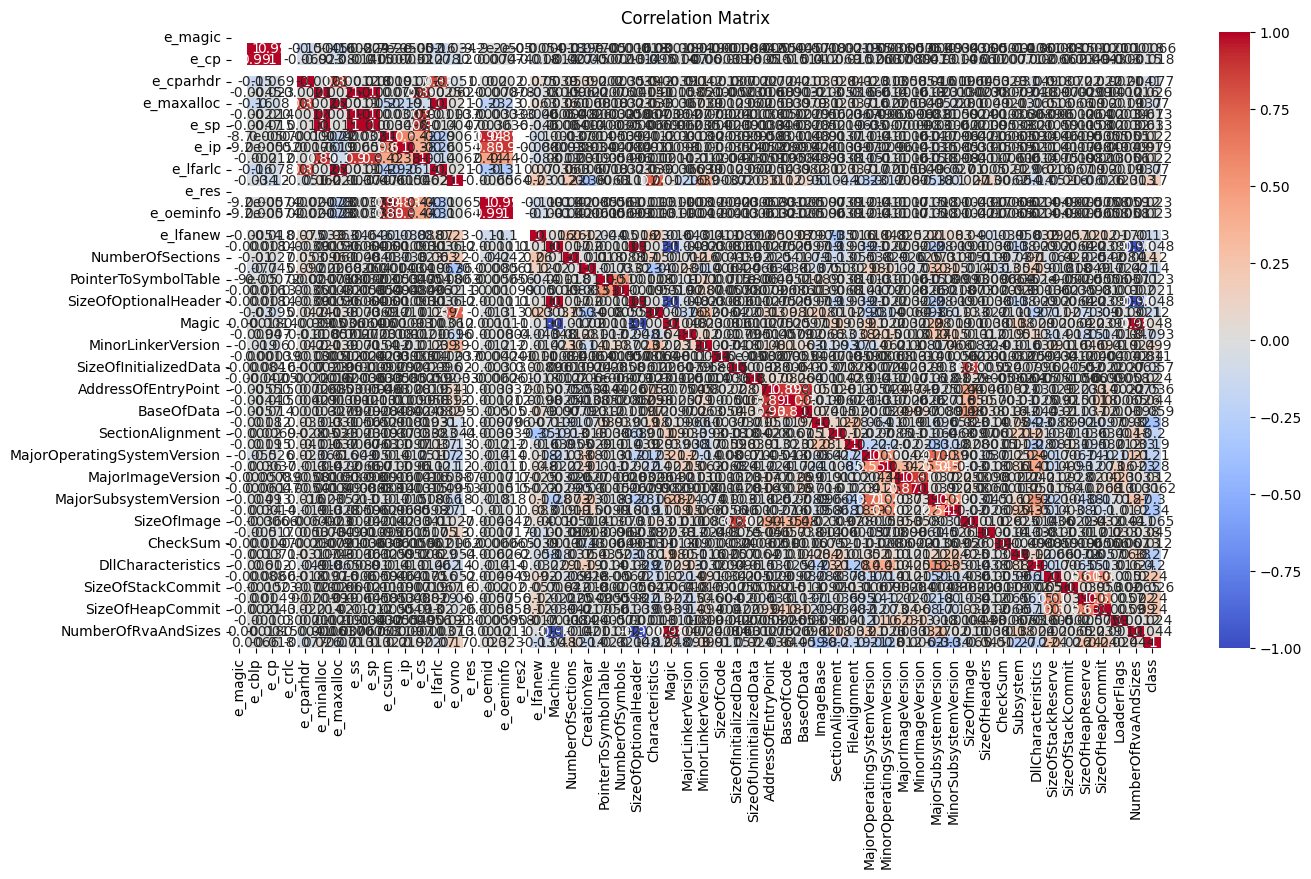

In [12]:
# Plot the correlation matrix using seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [13]:
class_correlations = correlation_matrix[target].sort_values(ascending=False)
all_list_atributs = correlation_matrix[target].sort_values(ascending=False).index.tolist()
list_atributs = all_list_atributs[1:]

# Display the sorted correlations
print(class_correlations)
print(list_atributs)

class                          1.000000
SizeOfStackReserve             0.243861
SizeOfHeapCommit               0.235746
SizeOfHeapReserve              0.235153
e_ovno                         0.170040
NumberOfSections               0.124798
MinorLinkerVersion             0.099256
Magic                          0.047762
SizeOfHeaders                  0.044557
NumberOfRvaAndSizes            0.044198
BaseOfCode                     0.043556
e_minalloc                     0.025531
SizeOfUninitializedData        0.024442
LoaderFlags                    0.023528
e_oemid                        0.023233
e_oeminfo                      0.023043
e_cs                           0.022322
e_csum                         0.021903
e_ip                           0.019424
e_ss                           0.013411
e_sp                           0.012614
CheckSum                       0.012330
MajorImageVersion              0.012285
SizeOfCode                     0.011383
e_cblp                         0.006623


In [14]:
class ClaMPDataset(): # 4 features -> most corelated atributs
  def __init__(self, target, cut = 0):
    self.target = target
    self.X, self.y, self.correlation_matrix = self.read_csv(cut)
    self.list_atributs = self.list_atributs_corralation()

  def list_atributs_corralation(self):
    # Unstack the correlation matrix to get pair-wise correlations as a series
    correlation_series = self.correlation_matrix.unstack()
    # Convert the series to a DataFrame for better manipulation
    correlation_df = pd.DataFrame(correlation_series, columns=['correlation']).reset_index()
    # Rename the columns for clarity
    correlation_df.columns = ['attribute_1', 'attribute_2', 'correlation']
    # Filter out self-correlations (where correlation == 1)
    correlation_df = correlation_df[correlation_df['attribute_1'] != correlation_df['attribute_2']]
    # Sort the correlation values from highest to lowest
    sorted_correlation_df = correlation_df.sort_values(by='correlation', ascending=False)
    # List to store the final results without repeated attributes
    top_correlations = []
    list_atributs = []
    used_attributes = set()
    for _, row in sorted_correlation_df.iterrows():
        if len(top_correlations) >= 8:
            break
        attr1, attr2, corr_value = row['attribute_1'], row['attribute_2'], row['correlation']
        if attr1 not in used_attributes and attr2 not in used_attributes:
            top_correlations.append((attr1, attr2, corr_value))
            list_atributs.append(attr1)
            list_atributs.append(attr2)
            used_attributes.add(attr1)
            used_attributes.add(attr2)
    return list_atributs

  def read_csv(self, cut):
    # Define the dataset path
    dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

    # List files in the directory to find the CSV file
    files = os.listdir(dataset_path)
    csv_files = [f for f in files if f.endswith('.csv')]

    # Load the first CSV file (assuming there's only one)
    if csv_files:
        df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
        #print("CSV found and send to df")  # Display first few rows
    else:
        print("No CSV file found in the dataset directory.")
    #df.dropna(axis=1, inplace=True)
    df = df.dropna(axis=1)
    df = self.create_cut(df, cut)
    y = df[self.target]
    X = df.drop(columns=[self.target])
    correlation_matrix = X.corr()
    return X,y,correlation_matrix

  def create_cut(self, df, cut=0):
    if cut == 0:
        return df

    # Select the rows where Class is 0 and 1
    class_0 = df[df[self.target] == 0]
    class_1 = df[df[self.target] == 1]
    
    # Select based on the condition of cut % 2 == 0 or cut % 2 == 1
    if cut % 2 == 0:
        df_n = pd.concat([class_0[:cut//2], class_1[:cut//2]])
    else:
        df_n = pd.concat([class_0[cut//2:], class_1[cut//2:]])

    return df_n

  def plot_correlation_matrix(self):
    # Plot the correlation matrix using seaborn
    plt.figure(figsize=(15, 8))
    sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
  def dataset(self, dimension):
    list_atributs = self.list_atributs
    X_dim = self.X[list_atributs[:dimension]]
    X_train, X_test, y_train, y_test = train_test_split(X_dim, self.y, test_size=0.2, random_state=42)
    #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

In [15]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class ClaMPDatasetGPT(): # 4 features -> most and least correlated atributs
    def __init__(self, target, cut=0):
        self.target = target
        self.X, self.y, self.correlation_matrix = self.read_csv(cut)
        self.list_atributs = self.list_atributs_correlation()

    def list_atributs_correlation(self):
        # Calculate the correlation of each feature with the target variable
        target_correlation = self.X.corrwith(self.y).abs()
        
        # Sort the features based on their absolute correlation with the target
        sorted_correlation = target_correlation.sort_values(ascending=False)
        
        # Select the top n features with the highest correlation
        top_n = 15  # You can adjust this number as needed
        top_correlated = sorted_correlation.head(top_n).index.tolist()
        
        # Select the top n features with the lowest correlation
        bottom_correlated = sorted_correlation.tail(top_n).index.tolist()
        
        # Combine the lists
        list_atributs = top_correlated + bottom_correlated
        
        return list_atributs

    def read_csv(self, cut):
        # Define the dataset path
        dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

        # List files in the directory to find the CSV file
        files = os.listdir(dataset_path)
        csv_files = [f for f in files if f.endswith('.csv')]

        # Load the first CSV file (assuming there's only one)
        if csv_files:
            df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
            #print("CSV found and send to df")  # Display first few rows
        else:
            print("No CSV file found in the dataset directory.")
        
        # Drop columns with NaN values
        df = df.dropna(axis=1)
        
        # Apply the cut if specified
        df = self.create_cut(df, cut)
        
        # Separate features and target
        y = df[self.target]
        X = df.drop(columns=[self.target])
        
        # Calculate the correlation matrix
        correlation_matrix = X.corr()
        
        return X, y, correlation_matrix

    def create_cut(self, df, cut=0):
        if cut == 0:
            return df

        # Select the rows where Class is 0 and 1
        class_0 = df[df[self.target] == 0]
        class_1 = df[df[self.target] == 1]
        
        # Select based on the condition of cut % 2 == 0 or cut % 2 == 1
        if cut % 2 == 0:
            df_n = pd.concat([class_0[:cut//2], class_1[:cut//2]])
        else:
            df_n = pd.concat([class_0[cut//2:], class_1[cut//2:]])

        return df_n

    def plot_correlation_matrix(self):
        # Plot the correlation matrix using seaborn
        plt.figure(figsize=(15, 8))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        plt.show()

    def dataset(self, dimension):
        list_atributs = self.list_atributs
        X_dim = self.X[list_atributs[:dimension]]
        X_train, X_test, y_train, y_test = train_test_split(X_dim, self.y, test_size=0.2, random_state=42)
        #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
        return X_train, X_test, y_train, y_test

# Quantum Backends


In [16]:
def backends(print_backend=False):  
  # Use this command if you didn't save your credentials:
  service = QiskitRuntimeService(channel="ibm_quantum", token="482cfbd6dec57e562dd79640807643b60b7388db6a0ff63e30b4bd92d4d55601a902c6f005413b8a69f6677daf23c82fa14626594ab3656d9c8c0e9229f920de")
  # Load saved credentials
  all = service.backends()
  quantum_backend = ""
  q_hardwares = []
  for i in range(0,len(all)):
    quantum_backend = str(all[i])
    if "<IBMBackend('ibm" in quantum_backend:
      quantum_backend = re.search(r"'(.*?)'", quantum_backend).group(1)  # Extract the text within single quotes
      q_hardwares.append(quantum_backend)
      if (print_backend==True):
        print("Quantum backend:", quantum_backend)
      #break
  return q_hardwares, service

## Metrics of Evaluation

We should ahve metrics of evaluation to the Quantum Machine Learning and also the Quantum Hardware with the [backend atributs](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.IBMBackend). So with this atribust we will be able to characterize the quantum computers.

In [17]:
def get_confusion_matrix_elements(test_labels, predictions):
    TP = np.sum((test_labels == 1) & (predictions == 1))
    TN = np.sum((test_labels == 0) & (predictions == 0))
    FP = np.sum((test_labels == 0) & (predictions == 1))
    FN = np.sum((test_labels == 1) & (predictions == 0))
    return TP, TN, FP, FN

def mean_qubits(backend, property):
  mean = 0
  for i in range(0,backend.num_qubits):
    if(property == 'readout_error'):
      mean += backend.properties().readout_error(i)
    elif(property=='t1'):
      mean += backend.properties().t2(0)
    elif(property=='t2'):
      mean += backend.properties().t2(0)
  mean=mean/backend.num_qubits
  return mean

def json_qiskit(name):
  TOKEN = "482cfbd6dec57e562dd79640807643b60b7388db6a0ff63e30b4bd92d4d55601a902c6f005413b8a69f6677daf23c82fa14626594ab3656d9c8c0e9229f920de"

  response = requests.request(
    "GET",
    "https://api.quantum-computing.ibm.com/runtime/workloads/me",
    headers={
        "Accept": "application/json",
        "Authorization": "Bearer "+TOKEN
    },
    )
  # Parse the JSON response
  usage_seconds = 0
  estimated_running_time_seconds = 0
  data = response.json()
  # Iterate over the 'workloads' list to find the latest backend with the name
  for workload in data['workloads']:
    if workload['backend'] == name:
          usage_seconds = workload.get('usage_seconds', None)
          estimated_running_time_seconds = workload.get('estimated_running_time_seconds', None)
          break
    else:
        #print(f"Backend {name} not found in the workloads.")
        continue
  return usage_seconds, estimated_running_time_seconds

def calculate_h_m_s_ms(end, start):
  # Calculate elapsed time in seconds
  elapsed_time_seconds = end - start
  # Convert elapsed time into hours, minutes, seconds
  hours = int(elapsed_time_seconds // 3600)
  minutes = int((elapsed_time_seconds % 3600) // 60)
  seconds = int(elapsed_time_seconds % 60)
  milliseconds = int((elapsed_time_seconds - int(elapsed_time_seconds)) * 1000)
  return elapsed_time_seconds#[hours, minutes, seconds, milliseconds]

# Define evaluation metric functions
def calculate_metrics(test_labels, predictions):
    TP, TN, FP, FN = get_confusion_matrix_elements(test_labels, predictions)
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0 #recall=sensitivity
    sensitivity = recall
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    # calculate sensitivity and specificity
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return TP, TN, FP, FN, accuracy, precision, sensitivity, specificity, f1_score

def calculate_metrics_hardware(backend):
  #Read the json according to the backend you are using and get the: 'usage_seconds', 'estimated_running_time_seconds'
  usage_seconds, estimated_running_time_seconds = json_qiskit(backend.name)
  mean_readout_error = mean_qubits(backend,'readout_error')
  mean_t1 = mean_qubits(backend,'t1')
  mean_t2 = mean_qubits(backend,'t1')

  return usage_seconds, estimated_running_time_seconds,mean_readout_error, mean_t1, mean_t2


In [18]:
import pandas as pd

# Create an empty DataFrame with specified columns
df_results = pd.DataFrame({
    'Model': [],
    'TP': [],
    'TN': [],
    'FP': [],
    'FN': [],
    'Accuracy': [],
    'Precision': [],
    'Sensitivity': [],
    'Specificity': [],
    'F1 Score': [],
    'Elapsed Time (s)':[],
    'Usage (s)':[],
    'Estimated Usage (s)': [],
    'Num Qubits': [],
    'Median T1':[],
    'Median T2':[],
    'Median Read Out Error':[]
})
df_results

,Model,TP,TN,FP,FN,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Elapsed Time (s),Usage (s),Estimated Usage (s),Num Qubits,Median T1,Median T2,Median Read Out Error


In [19]:
def inicial_df():
  # Create a DataFrame to store the results
  # df_results = pd.DataFrame({
  #     'Model', 'TP', 'TN', 'FP', 'FN', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Elapsed Time (s)', 'Num Qubits', 'Weights', 'Num Classes'
  # })
  df_results = pd.DataFrame({
    'Hardware': [],
    'Dimension': [],
    'TP': [],
    'TN': [],
    'FP': [],
    'FN': [],
    'Accuracy': [],
    'Precision': [],
    'Sensitivity': [],
    'Specificity': [],
    'F1 Score': [],
    'Elapsed Time (s)':[],
    'Usage (s)':[],
    'Estimated Usage (s)': [],
    'Num Qubits': [],
    'Median T1':[],
    'Median T2':[],
    'Median Read Out Error':[]
  })
  return df_results

def metrics_of_evaluation(name, dimension, qsvc,end,start,test_features, test_labels, backend):
  usage_seconds, estimated_running_time_seconds,mean_readout_error, mean_t1, mean_t2 = calculate_metrics_hardware(backend)
  #hours,minutes, seconds,milliseconds = calculate_h_m_s_ms(end, start)
  enlapse_time = end-start
  predictions = qsvc.predict(test_features)
  TP, TN, FP, FN, accuracy, precision, sensitivity, specificity, f1_score = calculate_metrics(test_labels, predictions)

  # Create a DataFrame to store the results
  df_results = pd.DataFrame({
      'Hardware':name,
      'Dimension':dimension,
      'TP': [TP],
      'TN': [TN],
      'FP': [FP],
      'FN': [FN],
      'Accuracy': [accuracy],
      'Precision': [precision],
      'Sensitivity': [sensitivity],
      'Specificity': [specificity],
      'F1 Score': [f1_score],
      'Elapsed Time (s)': [enlapse_time],
      'Usage (s)':[usage_seconds],
      'Estimated Usage (s)': [estimated_running_time_seconds],
      'Num Qubits': [backend.num_qubits],
      'Median T1':[mean_t1],
      'Median T2':[mean_t2],
      'Median Read Out Error':[mean_readout_error]

  })
  return df_results

def metrics_of_evaluation_classicaly(svc,dimension,end,start,test_features, test_labels):
  #usage_seconds, estimated_running_time_seconds,mean_readout_error, mean_t1, mean_t2 = calculate_metrics_hardware(backend)
  #hours,minutes, seconds,milliseconds = calculate_h_m_s_ms(end, start)

  predictions = svc.predict(test_features)
  TP, TN, FP, FN, accuracy, precision, sensitivity, specificity, f1_score = calculate_metrics(test_labels, predictions)
  usage_time = end-start
  # Create a DataFrame to store the results
  df_results = pd.DataFrame({
      'Dimension':dimension,
      'TP': [TP],
      'TN': [TN],
      'FP': [FP],
      'FN': [FN],
      'Accuracy': [accuracy],
      'Precision': [precision],
      'Sensitivity': [sensitivity],
      'Specificity': [specificity],
      'F1 Score': [f1_score],
      'Elapsed Time (s)': [usage_time],
      'Usage (s)':[usage_time],


  })
  return df_results

# QSVM

In [20]:
def qsvc_with_ibm_hardware(name, X_train, y_train, X_test, y_test, dimension, service):
  # Get backend
  backend = service.backend(name)
  # Sampler setup
  sampler = Sampler(backend)
  #fidelity = ComputeUncompute(sampler=sampler)

  #QSVC
  num_features = dimension#X_train.size
  feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
  ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
  MAXITER = 10
  optimizer = COBYLA(maxiter=MAXITER)

  # Quantum Kernel setup
  #quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
  quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

  # Transpile quantum kernel for the local backend
  feature_map_compiled = transpile(feature_map, backend=backend)

  # Quantum Kernel setup
  number_qubits = 127 if name != 'ibm_torino' else 133
  quantum_kernel_circuit = QuantumCircuit(number_qubits)#num_features+1)
  quantum_kernel_circuit.append(feature_map_compiled, range(number_qubits))#num_features+1))#range(num_features))

  # Use QuantumCircuit as part of FidelityQuantumKernel
  fidelity_quantum_kernel = FidelityQuantumKernel()
  fidelity_quantum_kernel._quantum_circuit = quantum_kernel_circuit

  # Classification with QSVC using the quantum kernel circuit
  qsvc = QSVC(quantum_kernel=fidelity_quantum_kernel)
  # Train QSVC
  qsvc.fit(X_train, y_train)
  # Test QSVC
  score = qsvc.score(X_test, y_test)
  #print(f"Callable kernel classification test score: {score}")
  return qsvc, backend


In [21]:
from sklearn.pipeline import make_pipeline


In [22]:
def main_qsvc(computers='all'):
  df_results = inicial_df()
  # malware = ClaMPDataset(target='class',cut=500)
  malware = ClaMPDatasetGPT(target='class',cut=500)
  if (computers!='all'):
    _ , service = backends()
    q_hardwares = [computers,computers]
  else:
    q_hardwares, service = backends()
  for dimension in range(9,12): #having samples > 10 will make kernel crash (December 2024)
    X_train, X_test, y_train, y_test = malware.dataset(dimension)
    print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    for i in range(0,len(q_hardwares)-1):
      q_hardware = q_hardwares[i]
      #print("Start evaluation in:", q_hardware)
      start = time.time()
      qsvc, backend = qsvc_with_ibm_hardware(q_hardware, X_train, y_train, X_test, y_test, dimension, service)
      df_model = metrics_of_evaluation(q_hardware,dimension, qsvc,time.time(),start,X_test, y_test, backend)
      #print("End evaluation in:", q_hardware)
      df_results = pd.concat([df_results,df_model], ignore_index=True)
      #print(df_results)
  return df_results

def main_svc():
  df_results = inicial_df()
  malware = ClaMPDataset(target='class',cut=500)
  for dimension in range(1,13):
    X_train, X_test, y_train, y_test = malware.dataset(dimension)
    print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    start = time.time()
    svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    svc.fit(X_train, y_train)
    df_model = metrics_of_evaluation_classicaly(svc,dimension,time.time(),start,X_test, y_test)

    df_results = pd.concat([df_results,df_model], ignore_index=True)
    print(df_results)
  return df_results


In [2]:
def main_qsvc_update_correlation_10_10(computers='all', start_at=0, end_at=20):
    df_results = inicial_df()
    malware = ClaMPDataset(target='class', cut=500)

    if computers != 'all':
        _, service = backends()
        q_hardwares = [computers, computers]
    else:
        q_hardwares, service = backends()

    results_file = "qsvc_results_correlation_10_10.csv"

    # Check if the file exists, if so, load existing data
    if os.path.exists(results_file):
        df_results = pd.read_csv(results_file)

    for dimension in range(start_at, end_at):  # having samples > 10 will make kernel crash (December 2024)
        X_train, X_test, y_train, y_test = malware.dataset(dimension)
        print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

        for i in range(0, len(q_hardwares) - 1):
            q_hardware = q_hardwares[i]
            start = time.time()
            qsvc, backend = qsvc_with_ibm_hardware(q_hardware, X_train, y_train, X_test, y_test, dimension, service)
            df_model = metrics_of_evaluation(q_hardware, dimension, qsvc, time.time(), start, X_test, y_test, backend)

            df_results = pd.concat([df_results, df_model], ignore_index=True)

            # Save updated results to CSV
            df_results.to_csv(results_file, index=False)

            # Print the last updated row
            #print("Last Updated Row:\n", df_results.iloc[-1])

    return df_results
    
def main_qsvc_update_correlation_10_0(computers='all', start_at=0, end_at=20):
    df_results = inicial_df()
    malware = ClaMPDatasetGPT(target='class', cut=500)

    if computers != 'all':
        _, service = backends()
        q_hardwares = [computers, computers]
    else:
        q_hardwares, service = backends()

    results_file = "qsvc_results_correlation_10_0.csv"

    # Check if the file exists, if so, load existing data
    if os.path.exists(results_file):
        df_results = pd.read_csv(results_file)

    for dimension in range(start_at, end_at):  # having samples > 10 will make kernel crash (December 2024)
        X_train, X_test, y_train, y_test = malware.dataset(dimension)
        print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

        for i in range(0, len(q_hardwares) - 1):
            q_hardware = q_hardwares[i]
            start = time.time()
            qsvc, backend = qsvc_with_ibm_hardware(q_hardware, X_train, y_train, X_test, y_test, dimension, service)
            df_model = metrics_of_evaluation(q_hardware, dimension, qsvc, time.time(), start, X_test, y_test, backend)

            df_results = pd.concat([df_results, df_model], ignore_index=True)

            # Save updated results to CSV
            df_results.to_csv(results_file, index=False)

            # Print the last updated row
            #print("Last Updated Row:\n", df_results.iloc[-1])

    return df_results

### Quantum Model Training

In [ ]:
df_result = main_qsvc_update_correlation_10_0("ibm_brisbane", start_at=2, end_at=20) #9-20
df_classic_2 = df_result.dropna(axis=1)
df_classic_2

In [65]:
df_result_brain = main_qsvc("ibm_brisbane")
df_classic = df_result_brain.dropna(axis=1)
df_classic

Quantum backend: ibm_brisbane
Quantum backend: ibm_brussels
Quantum backend: ibm_fez
Quantum backend: ibm_kyiv
Quantum backend: ibm_sherbrooke
Quantum backend: ibm_strasbourg
Quantum backend: ibm_torino
Quantum backend: ibmq_qasm_simulator
Shape:  (400, 2) (100, 2) (400,) (100,)
Shape:  (400, 3) (100, 3) (400,) (100,)
Shape:  (400, 4) (100, 4) (400,) (100,)
Shape:  (400, 5) (100, 5) (400,) (100,)
Shape:  (400, 6) (100, 6) (400,) (100,)
Shape:  (400, 7) (100, 7) (400,) (100,)
Shape:  (400, 8) (100, 8) (400,) (100,)
Shape:  (400, 9) (100, 9) (400,) (100,)


,Hardware,Dimension,TP,TN,FP,FN,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Elapsed Time (s),Usage (s),Num Qubits,Median T1,Median T2,Median Read Out Error
0,ibm_brisbane,2.0,0.0,46.0,0.0,54.0,0.46,0.0,0.0,1.000000,0.0,209.406815,4.912659,127.0,0.00006,0.00006,0.029214
1,ibm_brisbane,3.0,0.0,46.0,0.0,54.0,0.46,0.0,0.0,1.000000,0.0,561.004443,4.912659,127.0,0.00006,0.00006,0.029214
2,ibm_brisbane,4.0,0.0,46.0,0.0,54.0,0.46,0.0,0.0,1.000000,0.0,499.197264,4.912659,127.0,0.00006,0.00006,0.029214
3,ibm_brisbane,5.0,0.0,45.0,1.0,54.0,0.45,0.0,0.0,0.978261,0.0,711.344329,4.912659,127.0,0.00006,0.00006,0.029214
4,ibm_brisbane,6.0,0.0,45.0,1.0,54.0,0.45,0.0,0.0,0.978261,0.0,1007.151825,4.912659,127.0,0.00006,0.00006,0.029214
5,ibm_brisbane,7.0,0.0,45.0,1.0,54.0,0.45,0.0,0.0,0.978261,0.0,1391.518141,4.912659,127.0,0.00006,0.00006,0.029214
6,ibm_brisbane,8.0,0.0,45.0,1.0,54.0,0.45,0.0,0.0,0.978261,0.0,1862.634594,4.912659,127.0,0.00006,0.00006,0.029214
7,ibm_brisbane,9.0,0.0,45.0,1.0,54.0,0.45,0.0,0.0,0.978261,0.0,18231.695372,4.912659,127.0,0.00006,0.00006,0.029214


The problem is that we are doing feature selection based on the best features that are more corelated with our output. But we want to have features that are now as good to our output. Like the best corelated and the least corelated for example

In [25]:
df_result = main_qsvc_update_correlation_10_0("ibm_brisbane", start_at=12, end_at=20) #9-20
df_classic_2 = df_result.dropna(axis=1)
df_classic_2

/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Shape:  (400, 12) (100, 12) (400,) (100,)


: 

: 

In [71]:
print(y.nunique())  # Count of unique values per column
print(y.unique())
print(y.unique().sum())

2
[0 1]
1


In [73]:
counts = y.value_counts()
print(f"Number of 0s: {counts.get(0, 0)}")
print(f"Number of 1s: {counts.get(1, 0)}")

Number of 0s: 2501
Number of 1s: 2683


### Classic Model Training:

In [ ]:
df_result_brain = main_brain_tumor("all")

### Experiments for specific hardwares (300K CLOPS_h vs 29k CLOPS_h)

In [30]:
df_result_brain = main_brain_tumor("ibm_brussels")
df_result_brain.to_csv("df_result_ibm_brussels_200kCLOPS_final.csv", index=False)


Shape:  (400, 2) (100, 2) (400,) (100,)
Shape:  (400, 3) (100, 3) (400,) (100,)
Shape:  (400, 4) (100, 4) (400,) (100,)
Shape:  (400, 5) (100, 5) (400,) (100,)
Shape:  (400, 6) (100, 6) (400,) (100,)
Shape:  (400, 7) (100, 7) (400,) (100,)
Shape:  (400, 8) (100, 8) (400,) (100,)
Shape:  (400, 9) (100, 9) (400,) (100,)


In [31]:
df_result_brain = main_brain_tumor("ibm_kyiv")
df_result_brain.to_csv("df_result_ibm_kyiv_30kCLOPS_final.csv", index=False)


Shape:  (400, 2) (100, 2) (400,) (100,)
Shape:  (400, 3) (100, 3) (400,) (100,)
Shape:  (400, 4) (100, 4) (400,) (100,)
Shape:  (400, 5) (100, 5) (400,) (100,)
Shape:  (400, 6) (100, 6) (400,) (100,)
Shape:  (400, 7) (100, 7) (400,) (100,)
Shape:  (400, 8) (100, 8) (400,) (100,)
Shape:  (400, 9) (100, 9) (400,) (100,)


In [26]:
# Initialize an empty DataFrame to collect results
big_df_result_brain_200 = pd.DataFrame()

# Run the function 20 times and append the results
for _ in range(20):
    df_result_brain = main_brain_tumor("ibm_brussels")
    big_df_result_brain_200 = pd.concat([big_df_result_brain_200, df_result_brain], ignore_index=True)

# Save the combined DataFrame as a CSV file
big_df_result_brain_200.to_csv("df_result_ibm_brussels_200kCLOPS2.csv", index=False)

print("The combined DataFrame has been saved as 'df_result_ibm_brussels_200kCLOPS.csv'.")

Shape:  (400, 2) (100, 2) (400,) (100,)
Shape:  (400, 3) (100, 3) (400,) (100,)
Shape:  (400, 4) (100, 4) (400,) (100,)
Shape:  (400, 5) (100, 5) (400,) (100,)
Shape:  (400, 6) (100, 6) (400,) (100,)
Shape:  (400, 7) (100, 7) (400,) (100,)
Shape:  (400, 8) (100, 8) (400,) (100,)


RequestsApiError: 'HTTPSConnectionPool(host=\'api.quantum.ibm.com\', port=443): Max retries exceeded with url: /runtime/backends/ibm_brussels/properties (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x49e212400>: Failed to resolve \'api.quantum.ibm.com\' ([Errno 8] nodename nor servname provided, or not known)"))'

In [27]:
big_df_result_brain_200.to_csv("df_result_ibm_brussels_200kCLOPS2.csv", index=False)


In [28]:
big_df_result_brain_200.head()

""


In [24]:
big_df_result_brain_200.to_csv("df_result_ibm_brussels_200kCLOPS.csv", index=False)


In [ ]:
# Initialize an empty DataFrame to collect results
big_df_result_brain_29 = pd.DataFrame()

# Run the function 20 times and append the results
for _ in range(20):
    df_result_brain = main_brain_tumor("ibm_brussels")
    big_df_result_brain_29 = pd.concat([big_df_result_brain_29, df_result_brain], ignore_index=True)

# Save the combined DataFrame as a CSV file
big_df_result_brain_29.to_csv("df_result_ibm_brussels_29kCLOPS.csv", index=False)

print("The combined DataFrame has been saved as 'df_result_ibm_brussels_29kCLOPS.csv'.")

## Export answer in external file

ML in classic computer.

In [116]:
# file_path = "/../results/df_result_classic.csv"
# df_classic.to_csv(file_path, index=False)

# Copy the original DataFrame
formatted_df = df_classic.copy()

# Identify the maximum values for the specified columns
columns_to_bold = ['TP', 'TN', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'Elapsed Time (s)']
max_values = formatted_df[columns_to_bold].max()

# Identify the minimum usage
usage_column = 'Usage (s)'  # Replace with the actual column name for usage
min_usage = formatted_df[usage_column].min()

# Round specified columns to 1 decimal place
columns_to_round = ['TP', 'TN', 'FP', 'FN']
formatted_df[columns_to_round] = formatted_df[columns_to_round].astype(float).round(1)

# Apply bold formatting to the maximum values
for col in columns_to_bold:
    formatted_df[col] = formatted_df[col].apply(lambda x: f"\\textbf{{{x}}}" if x == max_values[col] else x)

# Highlight the minimum usage value
formatted_df[usage_column] = formatted_df[usage_column].apply(
    lambda x: f"\\textbf{{{x}}}" if x == min_usage else x
)

# Generate the LaTeX table
latex_output = formatted_df.to_latex(
    index=False,
    escape=False,
    caption="Performance analysis of classification models with highlighted maximum values and minimum usage:",
    label="tab:classification_performance"
)

# Print the LaTeX table
print(latex_output)

\begin{table}
\caption{Performance analysis of classification models with highlighted maximum values and minimum usage:}
\label{tab:classification_performance}
\begin{tabular}{rllrrlllllll}
\toprule
Dimension & TP & TN & FP & FN & Accuracy & Precision & Sensitivity & Specificity & F1 Score & Elapsed Time (s) & Usage (s) \\
\midrule
1.000000 & 103.000000 & 94.000000 & 2.000000 & 1.000000 & 0.985000 & 0.980952 & 0.990385 & 0.979167 & 0.985646 & \textbf{0.024499177932739258} & 0.024499 \\
2.000000 & 103.000000 & 94.000000 & 2.000000 & 1.000000 & 0.985000 & 0.980952 & 0.990385 & 0.979167 & 0.985646 & 0.003330 & 0.003330 \\
3.000000 & 103.000000 & 92.000000 & 4.000000 & 1.000000 & 0.975000 & 0.962617 & 0.990385 & 0.958333 & 0.976303 & 0.002479 & \textbf{0.002479076385498047} \\
4.000000 & 103.000000 & 93.000000 & 3.000000 & 1.000000 & 0.980000 & 0.971698 & 0.990385 & 0.968750 & 0.980952 & 0.002781 & 0.002781 \\
5.000000 & \textbf{104.0} & \textbf{95.0} & 1.000000 & 0.000000 & \textbf{0.995}

In [12]:
import pandas as pd
import io

# Example of the printed DataFrame as a string
df_string = """
   Hardware  Dimension     TP    TN    FP    FN  Accuracy  Precision
0   ibm_brisbane        2.0  103.0  94.0   2.0   1.0     0.985   0.980952
1   ibm_brussels        2.0  103.0  94.0   2.0   1.0     0.985   0.980952
2   ibm_fez            2.0  103.0  94.0   2.0   1.0     0.985   0.980952
3   ibm_kyiv           2.0  103.0  94.0   2.0   1.0     0.985   0.980952
4   ibm_nazca          2.0  103.0  94.0   2.0   1.0     0.985   0.980952
5   ibm_sherbrooke     2.0  103.0  94.0   2.0   1.0     0.985   0.980952
6   ibm_strasbourg     2.0  103.0  94.0   2.0   1.0     0.985   0.980952
7   ibm_torino         2.0  103.0  94.0   2.0   1.0     0.985   0.980952
8   ibm_brisbane       3.0  101.0  72.0  24.0   3.0     0.865   0.808000
9   ibm_brussels       3.0  101.0  72.0  24.0   3.0     0.865   0.808000
"""

# Convert the string to a DataFrame
df = pd.read_csv(io.StringIO(df_string), delim_whitespace=True)

# Display the DataFrame
print(df)

         Hardware  Dimension     TP    TN    FP   FN  Accuracy  Precision
0    ibm_brisbane        2.0  103.0  94.0   2.0  1.0     0.985   0.980952
1    ibm_brussels        2.0  103.0  94.0   2.0  1.0     0.985   0.980952
2         ibm_fez        2.0  103.0  94.0   2.0  1.0     0.985   0.980952
3        ibm_kyiv        2.0  103.0  94.0   2.0  1.0     0.985   0.980952
4       ibm_nazca        2.0  103.0  94.0   2.0  1.0     0.985   0.980952
5  ibm_sherbrooke        2.0  103.0  94.0   2.0  1.0     0.985   0.980952
6  ibm_strasbourg        2.0  103.0  94.0   2.0  1.0     0.985   0.980952
7      ibm_torino        2.0  103.0  94.0   2.0  1.0     0.985   0.980952
8    ibm_brisbane        3.0  101.0  72.0  24.0  3.0     0.865   0.808000
9    ibm_brussels        3.0  101.0  72.0  24.0  3.0     0.865   0.808000


Hipothesis:
- The results might be different
- Superconducting qubit with

- Get the time for predicting the test data